<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

datagen = ImageDataGenerator(rescale=1.0/255)
generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/nguoi',
    target_size=(60, 60),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/nguoi',
    target_size=(60, 60),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,
    shuffle=False
)

class_labels = ['diana','jungkook', 'rose', 'suga','v']
X_batch, y_batch = next(generator)

model = Sequential([
    Dense(256, activation='relu', input_shape=(60*60*3,)),
    Dense(128, activation='relu'),
    Dense(generator.num_classes, activation='softmax')
])

x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], 60 * 60 * 3)
x_test = x_test.reshape(x_test.shape[0], 60 * 60 * 3)

Found 150 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 3.3613e-04 - val_accuracy: 0.4867 - val_loss: 3.1499
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 1.0000 - loss: 2.7912e-04 - val_accuracy: 0.3200 - val_loss: 7.5848
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6562 - loss: 2.0295 - val_accuracy: 0.4200 - val_loss: 4.1681
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9375 - loss: 0.2101 - val_accuracy: 0.4267 - val_loss: 5.4448
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7812 - loss: 1.6929 - val_accuracy: 0.3733 - val_loss: 6.0721
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7188 - loss: 2.0249 - val_accuracy: 0.4467 - val_loss: 4.6301
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.7812 - loss: 1.0893 - val_accuracy: 0.4000 - val_loss: 3.6001
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8438 - loss: 0.4868 - val_accuracy: 0.440

In [6]:
t_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5583 - loss: 3.1411
test_acc:51.33


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dự đoán: jungkook


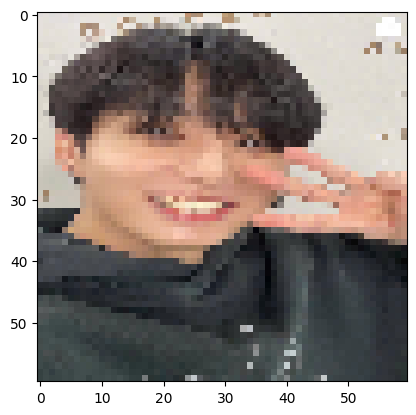

In [8]:
img = load_img('/content/drive/MyDrive/nguoi/jungkook/z6499278439062_5a44782efe9c98d70901cf08e60fd8ac.jpg', target_size=(60, 60))
plt.imshow(img)
img = img_to_array(img)
img_flatten = img.reshape(1, 60 * 60 * 3)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dự đoán: diana


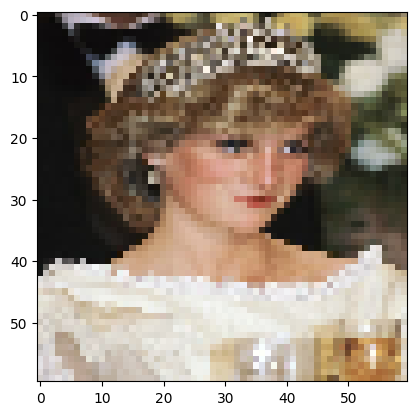

In [9]:
img = load_img('/content/drive/MyDrive/nguoi/diana/d1.jpg', target_size=(60, 60))
plt.imshow(img)
img = img_to_array(img)
img_flatten = img.reshape(1, 60 * 60 * 3)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dự đoán: v


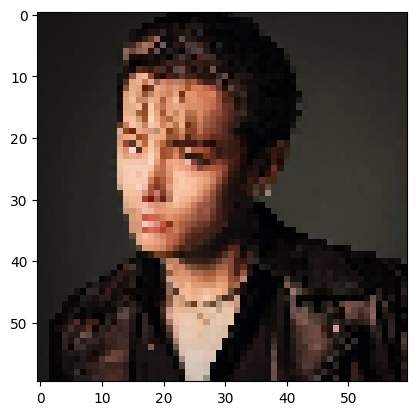

In [13]:
img = load_img('/content/drive/MyDrive/nguoi/v/v2.jpg', target_size=(60, 60))
plt.imshow(img)
img = img_to_array(img)
img_flatten = img.reshape(1, 60 * 60 * 3)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dự đoán: suga


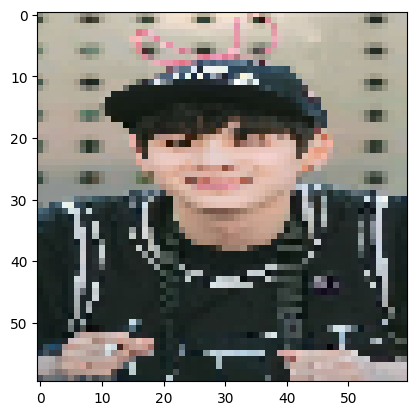

In [16]:
img = load_img('/content/drive/MyDrive/nguoi/suga/s12.jpg', target_size=(60, 60))
plt.imshow(img)
img = img_to_array(img)
img_flatten = img.reshape(1, 60 * 60 * 3)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Dự đoán: rose


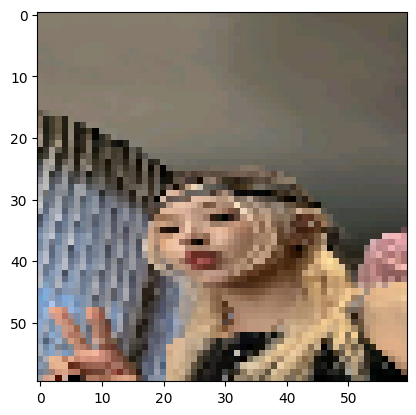

In [14]:
img = load_img('/content/drive/MyDrive/nguoi/rose/r12.jpg', target_size=(60, 60))
plt.imshow(img)
img = img_to_array(img)
img_flatten = img.reshape(1, 60 * 60 * 3)
img_flatten = img_flatten.astype('float32') / 255
y_pred_prob = model.predict(img_flatten)
predicted_class_index = int(np.argmax(y_pred_prob))
class_labels = list(generator.class_indices.keys())
print("Dự đoán:", class_labels[predicted_class_index])

In [18]:
model.save('nguoi.h5')